# 1. Data Pre-processing

## 1.1 Importing Necessary Libraries for Data preparation

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from skimage.transform import resize  # Used for resizing images
from skimage.io import imread, imshow  # For reading and displaying images
from tensorflow import keras  # For building and managing neural networks

# Path where dataset is stored
data_path = '/kaggle/input/input-data/Input'


# os: Allows interaction with the operating system (e.g., file handling)
# numpy: For numerical operations and array handling
# PIL (Python Imaging Library): Used for image processing
# matplotlib: For plotting and visualizing data
# tensorflow: For building and training machine learning models
# skimage (scikit-image): For image processing, including reading and transforming images

## 1.2 Loading and Preprocessing the Data

Shape of training data (images): (1328, 256, 256, 3)
Data type of images: uint8


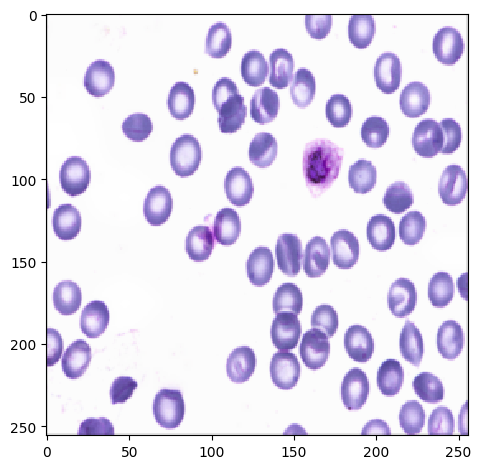

In [2]:
# Define the paths to the dataset for images and masks
image_data_path = '/kaggle/input/input-data/Input/Original'  # Path to the original images
mask_data_path = '/kaggle/input/input-data/Input/Mask'      # Path to the segmentation masks

# Define the image dimensions
row = 256  # Height of the image
columns = 256  # Width of the image


# Load the training images from the directory
train_data_path = '/kaggle/input/input-data/Input/Original'  # Path to training images
training_images = os.listdir(train_data_path)  # List of image filenames
training_images.sort()  # Sort images for consistency

# Initialize an array to hold the images
# X: A numpy array to store all images, with shape (number_of_images, height, width, channels)
X = np.zeros((len(training_images), row, columns, 3), dtype=np.uint8)  # Initialize with zeros


# Loop through the images, resize them, and store them in the X array
index = 0
for x in training_images:
    path = os.path.join(image_data_path, x)  # Get the full path of the image
    image = imread(path)  # Read the image from the path
    image = resize(image, (row, columns), mode='constant', preserve_range=True)  # Resize the image
    X[index] = image  # Store the resized image in the X array
    index += 1  # Increment index

# Output the shape of the loaded images array
print("Shape of training data (images):", X.shape)

# Optional: Normalize the images (commented out)
# X = X.astype('float32') / 255.0  # Normalize pixel values to the range [0, 1]

# Check the data type of the images array
print("Data type of images:", X.dtype)


# Visualize the first image in the dataset to verify
imshow(X[0])
plt.show()  # Display the image

## 1.3 Loading and Preprocessing the Masks

Shape of training data (masks): (1328, 256, 256, 3)
Data type of masks: uint8


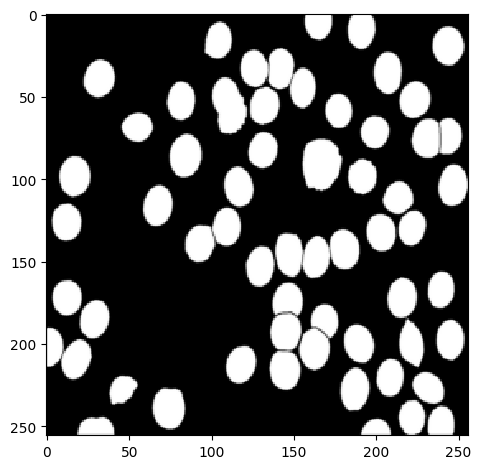

In [3]:
# Define the path to the mask images
train_data_path = '/kaggle/input/input-data/Input/Mask'  # Path to the mask images
training_masks = os.listdir(train_data_path)  # List of mask filenames
training_masks.sort()  # Sort masks for consistency

# Initialize an array to hold the mask images
# y: A numpy array to store all masks, with shape (number_of_masks, height, width, channels)
y = np.zeros((len(training_masks), row, columns, 3), dtype=np.uint8)  # Initialize with zeros


# Loop through the mask images, resize them, and store them in the y array
index = 0
for x in training_masks:
    path = os.path.join(mask_data_path, x)  # Get the full path of the mask
    image = imread(path)  # Read the mask from the path
    image = resize(image, (row, columns), mode='constant', preserve_range=True)  # Resize the mask
    y[index] = image  # Store the resized mask in the y array
    index += 1  # Increment index

# Output the shape of the loaded masks array
print("Shape of training data (masks):", y.shape)

# Check the data type of the masks array
print("Data type of masks:", y.dtype)


# Visualize the first mask in the dataset to verify
imshow(y[0])
plt.show()  # Display the mask

## 1.4 Splitting the Dataset into Training and Testing Sets

In [4]:
# Import necessary library for splitting the dataset
import numpy as np
from sklearn.model_selection import train_test_split  # Used to split the dataset into training and testing sets

# Split the dataset into 80% training and 20% testing
# X: Input images, y: Corresponding masks (labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Subheading: Verifying the Split
# Print the shapes of the training and testing data to verify the split
print("Training images shape:", X_train.shape)
print("Training masks shape:", y_train.shape)
print()
print("Testing images shape:", X_test.shape)
print("Testing masks shape:", y_test.shape)

# Optional: Data type conversion (commented out)
# Uncomment the following lines if you want to convert the data to float32 for neural network training

# X_train = X_train.astype('float32')  # Convert training images to float32
# y_train = y_train.astype('float32')  # Convert training masks to float32

# X_test = X_test.astype('float32')  # Convert testing images to float32
# y_test = y_test.astype('float32')  # Convert testing masks to float32

# Optional: Check the data types (commented out)
# Uncomment the following lines to verify the data types after conversion
# print("Data type of training images:", X_train.dtype)
# print("Data type of training masks:", y_train.dtype)
# print()
# print("Data type of testing images:", X_test.dtype)
# print("Data type of testing masks:", y_test.dtype)

Training images shape: (1062, 256, 256, 3)
Training masks shape: (1062, 256, 256, 3)

Testing images shape: (266, 256, 256, 3)
Testing masks shape: (266, 256, 256, 3)


## 1.5 Visualizing Training Images and Masks

Displaying the first training image:


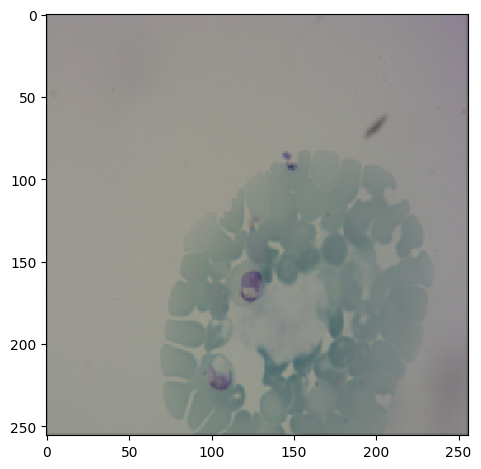

Displaying the corresponding mask for the first training image:


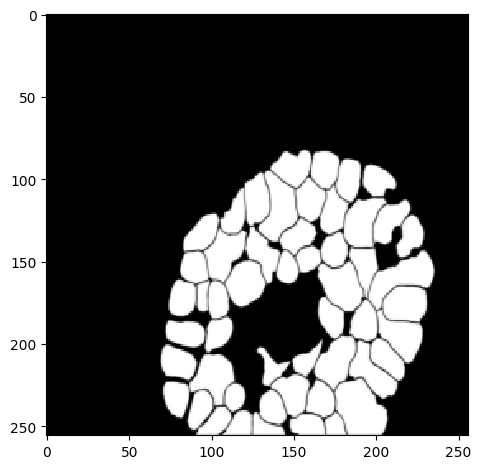

In [5]:
# Visualize the first image in the training set
# X_train contains the training images
print("Displaying the first training image:")
imshow(X_train[0])  # Display the first training image
plt.show()  # Show the plot

# Visualize the corresponding mask (label) for the first image
# y_train contains the corresponding masks for the training images
print("Displaying the corresponding mask for the first training image:")
imshow(y_train[0])  # Display the first mask
plt.show()  # Show the plot

## 1.6 Visualizing Testing Images and Masks

Displaying the first testing image:


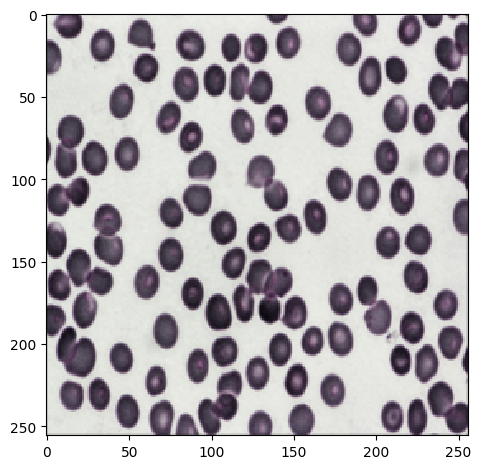

Displaying the corresponding mask for the first testing image:


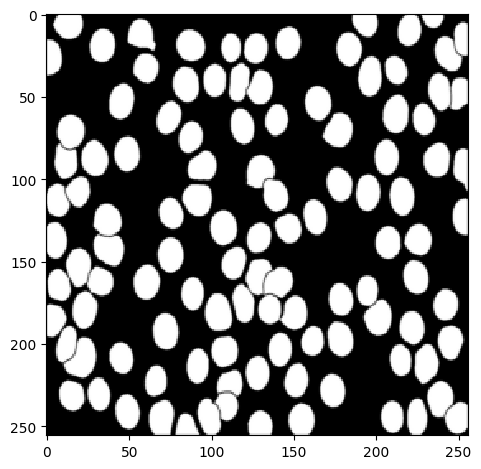

In [6]:
# Visualize the first image in the testing set
# X_test contains the testing images
print("Displaying the first testing image:")
imshow(X_test[0])  # Display the first testing image
plt.show()  # Show the plot

# Visualize the corresponding mask (label) for the first image in the test set
# y_test contains the corresponding masks for the testing images
print("Displaying the corresponding mask for the first testing image:")
imshow(y_test[0])  # Display the first testing mask
plt.show()  # Show the plot

## 1.7 Converting Masks to Boolean

In [7]:
# Convert the masks in the training set (y_train) to boolean type
# This is often done for binary masks, where 0 represents background and 1 represents the object
y_train = y_train.astype('bool')

# Print the data type of the training masks after conversion to confirm
print("Data type of training masks after conversion:", y_train.dtype)

Data type of training masks after conversion: bool


# 2. Model Training

## 2.1 Importing Libraries for Model Building and Training

In [8]:
# Keras and TensorFlow are used for building and training the deep learning model
# Keras models and layers provide a high-level interface for defining and training models

# Importing necessary libraries from Keras for model building and training
from keras.models import Model, load_model  # Model allows us to define custom models, load_model for saving/loading models
from keras.layers import Input  # Input layer for defining input shape of the model
from keras.layers import Dropout, Lambda  # Dropout: for regularization, Lambda: to wrap custom functions as layers
from keras.layers import Conv2D, Conv2DTranspose  # Conv2D: for convolutional layers, Conv2DTranspose: for deconvolution (upsampling)
from keras.layers import MaxPooling2D  # MaxPooling2D: for downsampling the feature maps
from keras.layers import concatenate  # concatenate: to merge different layers, especially in U-Net architecture
from keras.callbacks import EarlyStopping, ModelCheckpoint  # EarlyStopping: to stop training if performance stops improving, ModelCheckpoint: to save the best model

# Importing backend functions from TensorFlow
import tensorflow.keras.backend as K  # Backend utility functions, often used in custom loss functions or metrics
import tensorflow as tf  # TensorFlow framework, which Keras is built on

### 2.2 Defining Evaluation Metrics

In [9]:
# The Dice Coefficient and Jaccard Index (Intersection over Union, IoU) are commonly used metrics
# in segmentation tasks to evaluate the overlap between predicted masks and ground truth masks.

# Dice Coefficient: Measures the similarity between two samples (higher is better)
# Formula: 2 * (|A ∩ B|) / (|A| + |B|)

def dice_coef(a, b):
    # a: Ground truth mask
    # b: Predicted mask

    hi = a  # Ground truth mask
    pred = b  # Predicted mask

    # Flatten the masks to make the operation element-wise
    hi = keras.layers.Flatten()(hi)  # Flatten the ground truth mask
    pred = keras.layers.Flatten()(pred)  # Flatten the predicted mask

    # Calculate the numerator (intersection between ground truth and prediction)
    upper_part = 2 * tf.keras.backend.sum(hi * pred)  # Intersection is multiplied by 2

    # Calculate the denominator (sum of the ground truth and prediction)
    lower_part = tf.keras.backend.sum(hi + pred)

    # Dice Coefficient is the ratio of intersection over the total area
    dice = upper_part / lower_part

    return dice

# Jaccard Index (IoU): Measures the intersection over the union (higher is better)
# Formula: |A ∩ B| / (|A ∪ B|)

def jaccard_index(a, b):
    # a: Ground truth mask
    # b: Predicted mask

    hi = a  # Ground truth mask
    pred = b  # Predicted mask

    # Flatten the masks to make the operation element-wise
    hi = keras.layers.Flatten()(hi)  # Flatten the ground truth mask
    pred = keras.layers.Flatten()(pred)  # Flatten the predicted mask

    # Calculate the numerator (intersection between ground truth and prediction)
    numerator = tf.keras.backend.sum(hi * pred)  # Intersection

    # Calculate the denominator (union of ground truth and prediction)
    denominator = tf.keras.backend.sum(hi + pred - hi * pred)  # Union

    # Jaccard Index is the ratio of intersection over union
    iou = numerator / denominator

    return iou

## 2.3 TernausNet Model Architecture

In [10]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

"""
A Keras implementation of TernausNet16: 
https://arxiv.org/abs/1801.05746
https://github.com/ternaus/TernausNet
The architecture is very similar to the original U-net paper:
https://arxiv.org/abs/1505.04597
The key differences are:
- A VGG16 architecture is used for encoder, pretrained on ImageNet
- No batchnorm used
- No dropout used
- Shortcut concatenations are mismatched on number of filters meaning that 
  a larger number of filters is used in decoder.
"""


def decoder_block_ternausV2(inputs, mid_channels, out_channels):
    """
    Decoder block as proposed for TernausNet16 here: 
    https://arxiv.org/abs/1801.05746
    See DecoderBlockV2 here:
    https://github.com/ternaus/TernausNet/blob/master/unet_models.py
    - Concatenate u-net shortcut to input pre-upsample
    - Bilinear upsample input to double Height and Width dimensions
    - Note: The original ternausNet implementation includes option for 
      deconvolution instead of bilinear upsampling. Omitted here because I 
      couldn't find a meaningful performance comparison
    """
    
    conv_kwargs = dict(
        activation='relu',
        padding='same',
        kernel_initializer='he_normal',
        data_format='channels_last'  # (batch, height, width, channels)
    )

    x = UpSampling2D(size=(2, 2))(inputs) # interpolation='bilinear' doesn't work?
    x = Conv2D(mid_channels, 3, **conv_kwargs)(x)
    x = Conv2D(out_channels, 3, **conv_kwargs)(x)
    return x


# INTENDED API
# ------------------------------------------------------------------------------

def ternausNet16(input_size=(256, 256, 3), output_channels=3):
    """
    A Keras implementation of TernausNet16: 
    https://arxiv.org/abs/1801.05746
    https://github.com/ternaus/TernausNet
    """

    # input 
    # convert 1 channel grayscale to 3 channels if needed
    inputs = Input(input_size)
    if input_size[-1] < 3:
        x = Conv2D(3, 1)(inputs)                         # add channels
        input_shape = (input_size[0], input_size[0], 3)  # update input size
    else:
        x = inputs
        input_shape = input_size
    
    # Load pretrained VGG, conv layers include relu activation
    encoder = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
       
    # (None, 256, 256, 3)
    e1 = encoder.get_layer(name='block1_conv1')(x)
    e1 = encoder.get_layer(name='block1_conv2')(e1)
    # (None, 256, 256, 64)
    e2 = MaxPooling2D(pool_size=(2, 2))(e1)
    e2 = encoder.get_layer(name='block2_conv1')(e2)
    e2 = encoder.get_layer(name='block2_conv2')(e2)
    # (None, 128, 128, 128)
    e3 = MaxPooling2D(pool_size=(2, 2))(e2)
    e3 = encoder.get_layer(name='block3_conv1')(e3)
    e3 = encoder.get_layer(name='block3_conv2')(e3)
    e3 = encoder.get_layer(name='block3_conv3')(e3)
    # (None, 64, 64, 256)
    e4 = MaxPooling2D(pool_size=(2, 2))(e3)
    e4 = encoder.get_layer(name='block4_conv1')(e4)
    e4 = encoder.get_layer(name='block4_conv2')(e4)
    e4 = encoder.get_layer(name='block4_conv3')(e4)
    # (None, 32, 32, 512)
    e5 = MaxPooling2D(pool_size=(2, 2))(e4)
    e5 = encoder.get_layer(name='block5_conv1')(e5)
    e5 = encoder.get_layer(name='block5_conv2')(e5)
    e5 = encoder.get_layer(name='block5_conv3')(e5)
    # (None, 16, 16, 512)
    center = MaxPooling2D(pool_size=(2, 2))(e5)
    # (None, 8, 8, 512)
    center = decoder_block_ternausV2(center, 512, 256)
    # (None, 16, 16, 256)
    d5 = concatenate([e5, center], axis=3)
    d5 = decoder_block_ternausV2(d5, 512, 256)
    # (None, 32, 32, 256)
    d4 = concatenate([e4, d5], axis=3)
    d4 = decoder_block_ternausV2(d4, 512, 128)
    # (None, 64, 64, 128)
    d3 = concatenate([e3, d4], axis=3)
    d3 = decoder_block_ternausV2(d3, 256, 64)
    # (None, 128, 128, 64)
    d2 = concatenate([e2, d3], axis=3)
    d2 = decoder_block_ternausV2(d2, 128, 64)
    # (None, 256, 256, 64)
    # Note: no decoder block used at end
    d1 = concatenate([e1, d2], axis=3)
    #initializer = tf.keras.initializers.LecunUniform()
    d1 = Conv2D(32, 3, padding='same', kernel_initializer='he_normal')(d1)
    #'he_normal'
    d1 = ReLU()(d1)
    # (None, 256, 256, 32)

    # Output
    #if output_channels > 1:
        # untested
    #    op = tf.nn.log_softmax_v2(d1, axis=3)
    #else:
        
    op = Conv2D(output_channels, 1)(d1)
    op = Activation('sigmoid')(op)  # note: ternaus excludes

    # Build
    model = Model(inputs=[inputs], outputs=[op])
    
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.5,
    staircase=True)
    
    opt = keras.optimizers.Adam(learning_rate=0.0001)

    #model.compile(optimizer='adam', loss='binary_crossentropy')
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[dice_coef, jaccard_index])
    
    return model


In [11]:

model = ternausNet16()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 256, 256,  │     36,928 │ block1_conv1[1][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ block1_conv2[1][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 128, 128,  │    147,584 │ block2_conv1[1][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ block2_conv2[1][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 64, 64,    │    590,080 │ block3_conv1[1][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 64, 64,    │    590,080 │ block3_conv2[1][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ block3_conv3[1][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 32, 32,    │  2,359,808 │ block4_conv1[1][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 32, 32,    │  2,359,808 │ block4_conv2[1][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ block4_conv3[1][… │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 16, 16,    │  2,359,808 │ max_pooling2d_3[… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 16, 16,    │  2,359,808 │ block5_conv1[1][

 Total params: 28,467,779 (108.60 MB)

 Trainable params: 28,467,779 (108.60 MB)

 Non-trainable params: 0 (0.00 B)

## 2.4 Checking and Converting Data Types

In [13]:
# Print the data types of the training images and masks before conversion
print("Data type of X_train (images) before conversion:", X_train.dtype)
print("Data type of y_train (masks) before conversion:", y_train.dtype)

# Print the types of the training images and masks (should be numpy arrays)
print("Type of X_train:", type(X_train))  # Expected: <class 'numpy.ndarray'>
print("Type of y_train:", type(y_train))  # Expected: <class 'numpy.ndarray'>



# Convert the data types of the training images and masks to float32
X_train = X_train.astype('float32')  # Convert X_train to float32
y_train = y_train.astype('float32')  # Convert y_train to float32



# Print the data types of the training images and masks after conversion
print("Data type of X_train (images) after conversion:", X_train.dtype)
print("Data type of y_train (masks) after conversion:", y_train.dtype)

Data type of X_train (images) before conversion: uint8
Data type of y_train (masks) before conversion: bool
Type of X_train: <class 'numpy.ndarray'>
Type of y_train: <class 'numpy.ndarray'>
Data type of X_train (images) after conversion: float32
Data type of y_train (masks) after conversion: float32


## 2.5 Model Training with Early Stopping and Checkpoints

In [14]:
# Print the shapes of X_train and y_train to verify that they are correctly formatted
print("Shape of X_train (images):", X_train.shape)  # Output shape of the training images
print("Shape of y_train (masks):", y_train.shape)   # Output shape of the training masks



# Define the file path where the best model will be saved
filepath = "/kaggle/working/model.keras"  # Path to save the best model during training

# Early stopping callback: Stop training if the validation loss doesn't improve after 5 epochs (patience=5)
earlystopper = EarlyStopping(patience=5, verbose=1)

# Model checkpoint callback: Save the model with the lowest validation loss
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# List of callbacks to be used during training
callbacks_list = [earlystopper, checkpoint]



# Train the U-Net model with the specified parameters
# validation_split=0.1: 10% of the training data will be used for validation
# batch_size=1: Training will be performed with a batch size of 1
# epochs=5: The model will be trained for 5 epochs
history = model.fit(X_train, y_train, 
                    validation_split=0.2,  # 10% of the training data will be used for validation
                    batch_size=1,          # Set batch size to 1 (this can be increased for faster training)
                    epochs=20,              # Train for 20 epochs
                    callbacks=callbacks_list)  # Use the defined callbacks for early stopping and checkpointing

Shape of X_train (images): (1062, 256, 256, 3)
Shape of y_train (masks): (1062, 256, 256, 3)
Epoch 1/20


I0000 00:00:1726809219.504916      72 service.cc:145] XLA service 0x7d98e40022c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726809219.504970      72 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726809219.504975      72 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/849 ━━━━━━━━━━━━━━━━━━━━ 7:42:03 33s/step - dice_coef: 0.3370 - jaccard_index: 0.2026 - loss: 63.7156

I0000 00:00:1726809245.318113      72 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


849/849 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - dice_coef: 0.9195 - jaccard_index: 0.8591 - loss: 5.9266
Epoch 1: val_loss improved from inf to 0.44825, saving model to /kaggle/working/model.keras
849/849 ━━━━━━━━━━━━━━━━━━━━ 131s 116ms/step - dice_coef: 0.9196 - jaccard_index: 0.8592 - loss: 5.9223 - val_dice_coef: 0.9565 - val_jaccard_index: 0.9171 - val_loss: 0.4483
Epoch 2/20
849/849 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - dice_coef: 0.9498 - jaccard_index: 0.9059 - loss: 0.4654
Epoch 2: val_loss improved from 0.44825 to 0.27495, saving model to /kaggle/working/model.keras
849/849 ━━━━━━━━━━━━━━━━━━━━ 100s 118ms/step - dice_coef: 0.9498 - jaccard_index: 0.9059 - loss: 0.4653 - val_dice_coef: 0.9512 - val_jaccard_index: 0.9080 - val_loss: 0.2750
Epoch 3/20
849/849 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - dice_coef: 0.9562 - jaccard_index: 0.9172 - loss: 0.2400
Epoch 3: val_loss improved from 0.27495 to 0.16730, saving model to /kaggle/working/model.keras
849/849 ━━━━━━━━━━━━━━━━━━━━ 100s 117m

## 2.6 Plotting Training History

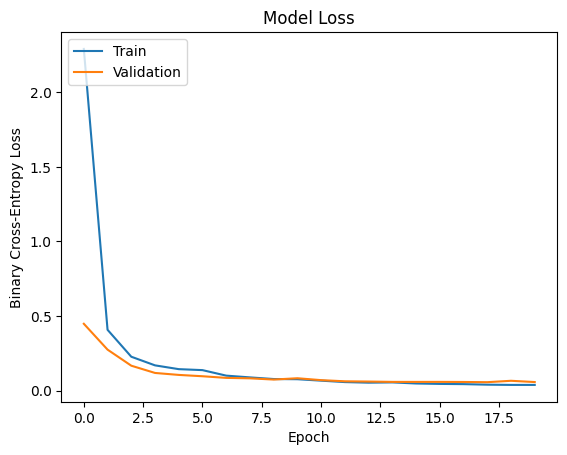

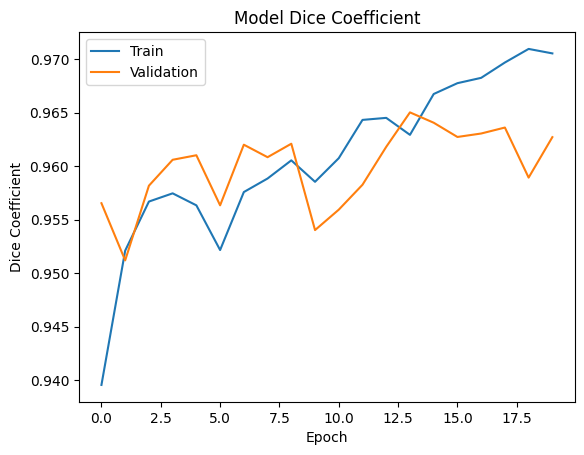

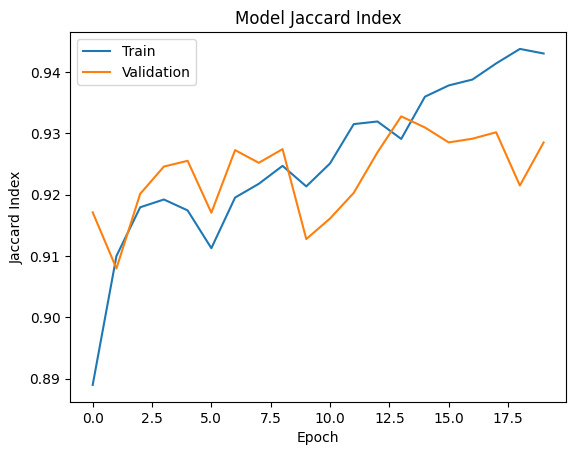

In [15]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])  # Training loss
plt.plot(history.history['val_loss'])  # Validation loss
plt.title('Model Loss')  # Title of the plot
plt.ylabel('Binary Cross-Entropy Loss')  # Label for the Y-axis
plt.xlabel('Epoch')  # Label for the X-axis
plt.legend(['Train', 'Validation'], loc='upper left')  # Legend indicating training and validation loss
plt.show()  # Show the plot



# Plot the training and validation Dice coefficient over epochs
plt.plot(history.history['dice_coef'])  # Training Dice coefficient
plt.plot(history.history['val_dice_coef'])  # Validation Dice coefficient
plt.title('Model Dice Coefficient')  # Title of the plot
plt.ylabel('Dice Coefficient')  # Label for the Y-axis
plt.xlabel('Epoch')  # Label for the X-axis
plt.legend(['Train', 'Validation'], loc='upper left')  # Legend indicating training and validation Dice coefficient
plt.show()  # Show the plot



# Plot the training and validation Jaccard index over epochs
plt.plot(history.history['jaccard_index'])  # Training Jaccard index
plt.plot(history.history['val_jaccard_index'])  # Validation Jaccard index
plt.title('Model Jaccard Index')  # Title of the plot
plt.ylabel('Jaccard Index')  # Label for the Y-axis
plt.xlabel('Epoch')  # Label for the X-axis
plt.legend(['Train', 'Validation'], loc='upper left')  # Legend indicating training and validation Jaccard index
plt.show()  # Show the plot

# 3. Model Inference (Testing)

In [16]:
# Convert X_test to float32 for consistency with model input requirements
X_test = X_test.astype('float32')

# Convert y_test to float64 (this might be necessary if certain operations require higher precision)
y_test = y_test.astype('float64')



# Load the saved model weights from the file path where the best model was saved during training
model.load_weights('/kaggle/working/model.keras')



# Use the model to predict on the test dataset
# The output will be the predicted masks for the test images
test_preds = model.predict(X_test, batch_size = 8)

# Print the shape of the predictions to verify the output dimensions
print("Shape of test predictions:", test_preds.shape)

# Check the type of the predictions (should be a numpy array)
print("Type of test predictions:", type(test_preds))

34/34 ━━━━━━━━━━━━━━━━━━━━ 46s 609ms/step
Shape of test predictions: (266, 256, 256, 3)
Type of test predictions: <class 'numpy.ndarray'>


# 4. Evaluating Individual Metrics (Dice Coefficient and Jaccard Index)

In [17]:
# Dice Coefficient for individual evaluation
# This function computes the Dice Coefficient between two tensors (ground truth and predicted masks)
def dice_coef2(a, b):
    # a: Ground truth mask (scaled down by 255)
    # b: Predicted mask

    # Normalize the ground truth mask by dividing by 255
    hi = a / 255
    pred = b

    # Flatten both ground truth and predicted masks to perform element-wise operations
    hi = keras.layers.Flatten()(hi)  # Flatten the ground truth mask
    pred = keras.layers.Flatten()(pred)  # Flatten the predicted mask

    # Calculate the numerator: 2 * intersection between ground truth and predicted masks
    upper_part = 2 * tf.keras.backend.sum(hi * pred)

    # Calculate the denominator: sum of ground truth and predicted masks
    lower_part = tf.keras.backend.sum(hi + pred)

    # Dice Coefficient formula
    dice = upper_part / lower_part

    return dice

# Jaccard Index (IoU) for individual evaluation
# This function computes the Jaccard Index (IoU) between two tensors (ground truth and predicted masks)
def jaccard_index2(a, b):
    # a: Ground truth mask (scaled down by 255)
    # b: Predicted mask

    # Normalize the ground truth mask by dividing by 255
    hi = a / 255
    pred = b

    # Flatten both ground truth and predicted masks
    hi = keras.layers.Flatten()(hi)  # Flatten the ground truth mask
    pred = keras.layers.Flatten()(pred)  # Flatten the predicted mask

    # Calculate the numerator: intersection between ground truth and predicted masks
    numerator = tf.keras.backend.sum(hi * pred)

    # Calculate the denominator: union of ground truth and predicted masks
    denominator = tf.keras.backend.sum(hi + pred - hi * pred)

    # Jaccard Index formula
    iou = numerator / denominator

    return iou

## 4.1 Evaluating and Visualizing Predictions

Data type of ground truth mask (y_test[0]): float64
Data type of predicted mask (test_preds[0]): float32
Dice Coefficient: tf.Tensor(0.8795944, shape=(), dtype=float32)
Jaccard Index: tf.Tensor(0.7850678, shape=(), dtype=float32)


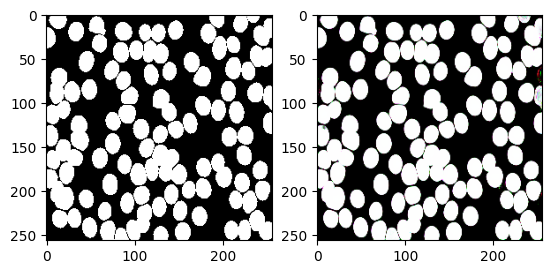

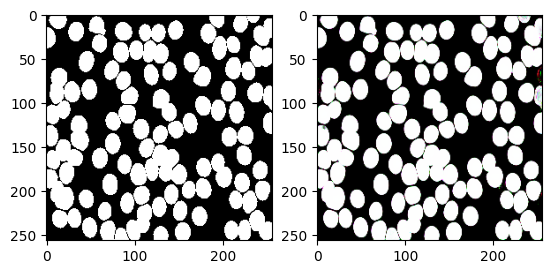

In [18]:
from skimage.io import imshow_collection
# Print the data types of the ground truth and predicted masks for verification
print("Data type of ground truth mask (y_test[0]):", y_test[0].dtype)
print("Data type of predicted mask (test_preds[0]):", test_preds[0].dtype)

# Select the first ground truth and predicted masks for evaluation
i = y_test[0]  # Ground truth mask
j = test_preds[0]  # Predicted mask

# Subheading: Computing the Dice Coefficient and Jaccard Index

# Compute the Dice Coefficient between the ground truth and predicted masks
result = dice_coef2(i, j)
print('Dice Coefficient:', result)

# Compute the Jaccard Index between the ground truth and predicted masks
result2 = jaccard_index2(i, j)
print('Jaccard Index:', result2)



# Create an array to hold the ground truth and predicted masks for visualization
x = np.zeros((2, row, columns, 3))  # Shape to hold two images: ground truth and predicted
x[0] = i  # Ground truth mask
x[1] = j  # Predicted mask

# Visualize the ground truth and predicted masks side by side using imshow_collection
imshow_collection(x)  # Display both masks (ground truth and prediction) for compa

## 4.2 Average Test Dice Coefficient and Jaccard Index

In [19]:
# Initialize variables to hold the sum of Dice Coefficient and Jaccard Index values
avg_dice = 0  # Variable to accumulate Dice Coefficient values
avg_jaccard = 0  # Variable to accumulate Jaccard Index values

# Subheading: Calculating Metrics for Each Test Sample

# Loop through all the test samples to compute the Dice Coefficient and Jaccard Index
for x in range(len(test_preds)):
    i = y_test[x]  # Ground truth mask for the x-th test sample
    j = test_preds[x]  # Predicted mask for the x-th test sample
    
    # Compute Dice Coefficient and Jaccard Index for the current sample and accumulate the results
    avg_dice += tf.get_static_value(dice_coef2(i, j))  # Add current Dice Coefficient to the total sum
    avg_jaccard += tf.get_static_value(jaccard_index2(i, j))  # Add current Jaccard Index to the total sum



# Calculate the average Dice Coefficient and Jaccard Index by dividing by the number of test samples
avg_dice = avg_dice / len(test_preds)
avg_jaccard = avg_jaccard / len(test_preds)



# Print the average Dice Coefficient and Jaccard Index for the test dataset
print('Average Test Dice Coefficient:', avg_dice)
print('Average Test Jaccard Index:', avg_jaccard)

Average Test Dice Coefficient: 0.8829350596980045
Average Test Jaccard Index: 0.7910525382013249


## 4.3 Highest and Lowest Values for Training and Validation

In [20]:
# Print the lowest training loss during model training
print('Lowest training loss:', min(history.history['loss']))

# Print the lowest validation loss during model validation
print('Lowest validation loss:', min(history.history['val_loss']))

# Subheading: Printing Highest Dice Coefficient

# Print the highest training Dice Coefficient achieved during training
print('Highest training Dice Coefficient:', max(history.history['dice_coef']))

# Print the highest validation Dice Coefficient achieved during validation
print('Highest validation Dice Coefficient:', max(history.history['val_dice_coef']))



# Print the highest training Jaccard Index achieved during training
print('Highest training Jaccard Index:', max(history.history['jaccard_index']))

# Print the highest validation Jaccard Index achieved during validation
print('Highest validation Jaccard Index:', max(history.history['val_jaccard_index']))

Lowest training loss: 0.038444358855485916
Lowest validation loss: 0.05681800842285156
Highest training Dice Coefficient: 0.9709517955780029
Highest validation Dice Coefficient: 0.965020477771759
Highest training Jaccard Index: 0.9437826871871948
Highest validation Jaccard Index: 0.9327806830406189
